In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.9/921.9 kB 18.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ultralytics import YOLO
from roboflow import Roboflow
import cv2
import matplotlib.pyplot as plt
import os
import shutil

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
model = YOLO('yolo12s.pt')

100%|██████████| 18.1M/18.1M [00:00<00:00, 159MB/s]


In [6]:

results = model.train(data="/kaggle/input/weapon-detection-dataset/data.yaml",batch=8, epochs=30, imgsz=640)

Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo12s.pt, data=/kaggle/input/weapon-detection-dataset/data.yaml, epochs=30, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

train: Scanning /kaggle/input/weapon-detection-dataset/train/labels... 1059 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1059/1059 [00:01<00:00, 788.10it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/weapon-detection-dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/input/weapon-detection-dataset/valid/labels... 99 images, 0 backgrounds, 0 corrupt: 100%|██████████| 99/99 [00:00<00:00, 658.33it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/weapon-detection-dataset/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.34G      1.408      3.423      1.821         17        640: 100%|██████████| 133/133 [00:33<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.08it/s]

                   all         99        201      0.269      0.356      0.226      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.31G      1.605       2.97      1.985         15        640: 100%|██████████| 133/133 [00:32<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.34it/s]

                   all         99        201     0.0975      0.357      0.106     0.0513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30       3.2G      1.641      2.954      2.003         19        640: 100%|██████████| 133/133 [00:31<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]

                   all         99        201      0.115      0.238      0.116     0.0478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30       3.2G      1.676      2.942      2.017          6        640: 100%|██████████| 133/133 [00:32<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.36it/s]

                   all         99        201      0.104       0.32      0.136     0.0674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.21G      1.636      2.844      1.979          7        640: 100%|██████████| 133/133 [00:31<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.53it/s]

                   all         99        201      0.237      0.406      0.219      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      3.27G      1.544      2.759      1.938          7        640: 100%|██████████| 133/133 [00:32<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.50it/s]

                   all         99        201      0.214      0.282      0.237      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      3.19G      1.537      2.742      1.906         10        640: 100%|██████████| 133/133 [00:32<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.59it/s]

                   all         99        201      0.171       0.44      0.278      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      3.18G      1.497      2.697      1.884          7        640: 100%|██████████| 133/133 [00:31<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.44it/s]

                   all         99        201      0.276      0.362      0.283      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       3.2G      1.454      2.585      1.844          6        640: 100%|██████████| 133/133 [00:32<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.52it/s]

                   all         99        201      0.256      0.515      0.306      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.19G      1.418      2.517      1.824         10        640: 100%|██████████| 133/133 [00:31<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.65it/s]

                   all         99        201      0.279      0.411      0.285      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      3.21G      1.418      2.476      1.811          9        640: 100%|██████████| 133/133 [00:32<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.65it/s]

                   all         99        201      0.251      0.453       0.31      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      3.21G      1.355      2.409      1.771          3        640: 100%|██████████| 133/133 [00:32<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.49it/s]

                   all         99        201      0.338      0.505      0.428      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      3.21G      1.292      2.318      1.715         10        640: 100%|██████████| 133/133 [00:31<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.48it/s]

                   all         99        201      0.293      0.498      0.427      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.27G      1.265      2.303      1.696         27        640: 100%|██████████| 133/133 [00:32<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.64it/s]

                   all         99        201      0.377      0.537      0.465      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30       3.2G      1.239      2.237      1.675          5        640: 100%|██████████| 133/133 [00:32<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.52it/s]

                   all         99        201      0.393      0.545      0.511       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.21G      1.238      2.236      1.688          9        640: 100%|██████████| 133/133 [00:31<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.63it/s]

                   all         99        201      0.302       0.49      0.384      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.18G      1.203      2.166      1.656         11        640: 100%|██████████| 133/133 [00:32<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.68it/s]

                   all         99        201      0.358      0.548      0.476      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      3.17G      1.193      2.087      1.644         13        640: 100%|██████████| 133/133 [00:32<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.36it/s]

                   all         99        201      0.438      0.544      0.495      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.21G       1.18      2.044      1.633         11        640: 100%|██████████| 133/133 [00:31<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.61it/s]

                   all         99        201      0.525      0.563      0.552      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.19G      1.114       1.96      1.585         12        640: 100%|██████████| 133/133 [00:32<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.46it/s]

                   all         99        201      0.431      0.645       0.52      0.365


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30       3.2G      1.091      1.727      1.669          3        640: 100%|██████████| 133/133 [00:32<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.48it/s]

                   all         99        201       0.42      0.516        0.5      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.27G      1.035      1.621      1.619         14        640: 100%|██████████| 133/133 [00:31<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.56it/s]

                   all         99        201      0.555      0.509      0.525      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.19G     0.9784       1.48      1.562          4        640: 100%|██████████| 133/133 [00:32<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.49it/s]

                   all         99        201      0.532      0.506      0.526      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.19G      0.954      1.455      1.522          9        640: 100%|██████████| 133/133 [00:31<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.58it/s]

                   all         99        201      0.551      0.563      0.596      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.19G     0.8949      1.358      1.474          3        640: 100%|██████████| 133/133 [00:31<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.70it/s]

                   all         99        201      0.558      0.607      0.628      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.17G     0.8769      1.282      1.474          7        640: 100%|██████████| 133/133 [00:31<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.48it/s]

                   all         99        201      0.723      0.524      0.649      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.21G     0.8394       1.17      1.433          3        640: 100%|██████████| 133/133 [00:31<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.78it/s]

                   all         99        201       0.53      0.689      0.676       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30       3.2G     0.8191      1.145      1.409          5        640: 100%|██████████| 133/133 [00:31<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.44it/s]

                   all         99        201      0.592      0.616       0.65      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.18G     0.7941      1.099      1.385          3        640: 100%|██████████| 133/133 [00:31<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.68it/s]

                   all         99        201      0.648      0.562      0.665      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.27G     0.7634      1.062      1.356          4        640: 100%|██████████| 133/133 [00:31<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.58it/s]

                   all         99        201      0.705      0.552      0.685      0.528



30 epochs completed in 0.289 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 18.9MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 18.9MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 159 layers, 9,234,750 parameters, 0 gradients, 21.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]


                   all         99        201      0.701      0.551      0.686      0.528
       Automatic Rifle          8         35       0.87      0.192       0.51      0.334
               Bazooka         12         13      0.554      0.462      0.562      0.447
      Grenade Launcher          8          9      0.477      0.444      0.599       0.54
               Handgun          8         29      0.822      0.862      0.929      0.795
                 Knife         12         34      0.786      0.618      0.761      0.457
                   SMG         15         29      0.903      0.642      0.858      0.801
               Shotgun         10         18      0.582      0.667      0.688      0.545
                Sniper         11         11      0.552      0.364      0.469      0.262
                 Sword         17         23      0.764      0.704      0.796      0.571


invalid value encountered in less
invalid value encountered in less


Speed: 0.2ms preprocess, 9.6ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs/detect/train2


In [7]:
best_model = YOLO('/kaggle/working/runs/detect/train2/weights/last.pt')

In [8]:
results = best_model(['/kaggle/input/weapon-detection-dataset/test/images/Automatic-Rifle_9_jpeg.rf.74f07108278604cc9f8fd8c2aa776133.jpg'])  # return a list of Results objects
result = results[0]


0: 640x640 3 Automatic Rifles, 20.5ms
Speed: 2.0ms preprocess, 20.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


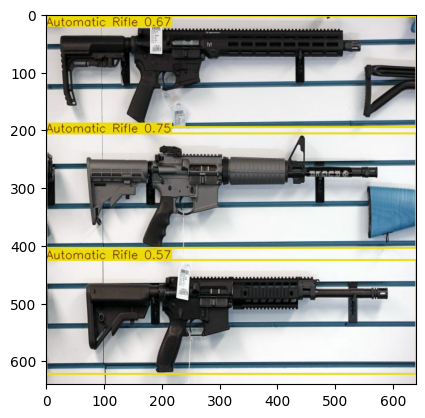

In [9]:
plt.imshow(result.plot())